<a href="https://colab.research.google.com/github/steeve85ok/SIM_YAC_ALMEIDA_UPSE2023/blob/main/ex%2024%2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ejercicio 24 .	Resuelva el siguiente ejercicio implementando un esquema explicito obteniendo distribución de Presiones en PSI y Caudales en Ft^3/Hora
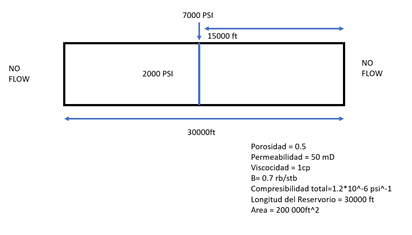

ejercicio 25 . Resuelva el siguiente ejercicio implementando un esquema implicito obteniendo distribución de Presiones en PSI y Caudales en

In [ ]:

import numpy  as np
import math

datos de yacimiento y seteos

In [ ]:
L=30000                 #Longitud total del yacimiento
dx=2000                 #espacios entre nodos (seteo); daran el numero de columnas; en este caso seran 15
Tiempo=100000           # tiempo en días es obtenido por (numero de iteraciones * dt = numero de días) (seteo); iteraciones es numero de filas; en este caso srán 500
DT=200                   # intervalo de tiempo por día (seteo)
K=50                    #Permeabilidad MD
por=0.5                 #porosidad
vis=1 # centipoise      #viscosidad
Beta=0.7                #factor volumetrico (rb/stb) (barriles yac / barriles standard)
CompTotal=1.2**(-6)       #psi-1 #compresibilidad total
A=200000                #ft^2           #area de yacimiento

comprobacion de estabilidad (seteos)

In [ ]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)  #eta es < que 0.5 para que el sistema sea estable
Eta

0.014929919999999996

Modelo explicito

In [ ]:

#Esquema Explicito
def Presdt(P0,P1,P2,Eta):    # son las definiciones de variables de la ecuación explicita
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)                 #corrección de condicion de frontera de dirichlet generalmente se la usa en la frontera izquierda
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #Matriz que guarda todo los resultados, es de acuerdo a las dimensiones del total de número de tiempos
                                            #(Filas t numero de iteraciones ) por el total número de nodos(columnas) se suma para correccion de Dirichler
                                            #1 a la izquierda y 1 a la derecha.

Condiciones iniciales (fronteras cero y pinyeccion 7000 psi en la mita del yacimiento)

In [ ]:
#Condiciones iniciales
Pyac=7000                 # presion de yacimiento (TEORIA, correccion frontera izq: P0= 2PB1-P1:   #P0=2000 #Presion en el nodo cero PB1=7000 #Presion en el borde 1)
Piz=2000                  # presion de frontera izquierda
Pder=0                   # presion de frontera derecha
Pin=np.ones((L//dx)+2)    # la corrección de condiciones de frontera es añadir dos nodos uno por extremo, es por esta razon que sumamos 2
Pres=np.zeros((L//dx)+2)  # vector vacio zeros que representa las condiciones iniciales.(cantidad de nodos de la matriz+2) creación de una matriz vacia
                          # con las mismas dimensiones de la matriz de donde se guardara todo los resultados
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac              # definición para obtener las demas celdas de la primera colulmna de la matriz sin contar los extremos
Pin[0]=2*Piz-Pin[1]       # Presión 0 corregida es igual a dos veces de la presion de la izquierda menos la presión Pinicial de 1
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2] #presión final es igual a dos veces la presión de la derecha menos la presión de la anterior que seria
                          # la longitud de Pinicial menos 2

Pin.shape

(17,)

In [ ]:
len(Pin)
Pexplicita.shape

(500, 17)

In [ ]:
t=DT                              # Tiempo que ha tarnscurrido despues del tiempo=0
Pexplicita[0]=Pin                 # presion explicita de la fila cero va ser igual a la presion inicial es decir le da valor inicial a la fila cero
while t<Tiempo:                   # Ciclo while es en base al tiempo (llenará desde la fila 2 hasta la fila 5)
  for i in range(0,len(Pin)-1):   # Ciclo For es en base al espacio, indica toda la fila de condiciones iniciales
    if i==0:                      # i vale cero nos referimos al primer nodo izq, de la fila t=0 condicones iniciales
      Pres[i]=2*Piz-Pin[1]        # se edito por las correcciones dirichlet de frontera, # Presión de resultado evaluado en i  va ser la misma presion
                                  # de la condición inicial
    elif i==len(Pin)-1:           # representa el ultimo nodo (fila lado derecho) que es la longitud del vector de la fila t=0 de las condiciones iniciales
      Pres[i]=2*Pder-Pin[len(Pin)-2]  #se edito## La presion de resultado es igual a la presion inicial del ultimo nodo final derecho añadido un nodo t=0
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)  #llamamos a la función este codigo de presion de resultado nos ayuda a obtener los siguientes nodos(i)
                                                    # de en medio de la fila de dt, y se repite el ciclo para las siguientes dt
  Pexplicita[t//DT]=Pres           # MATRIZ de solucion o DE RESULTADOS Los valores calculados de los triangulos se guardaran en la matriz de resultados,
                                   # tiempo/delta t obtenemos el numero de iteraciones o indices de cada fila/A MEDIDA QUE VAMOS AUMENTANDO EL DT ES IGUAL
                                   # A LA PRESION CALCULADA
  t=t+DT                           # las siguientes filas de dt en este caso 3dt en adelante y las siguientes iteraciones se vayan calculando
  Pin=Pres                         # la presion inicial cambia a medida que vamos llenano los triangulos

In [ ]:
#Esquema Implicito se resuelve con un sistemas de ecuaciones,una de las caracteristica es el tamaño de la matriz diagonal depende de los triangulos
#que son ecuaciones lineales al mismo tiempo tenemos incognitas
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2)) # se crea la matriz q va obtner los resultados las dimensiones de la matriz son (tiempo/DT,L/DX), adicional se
                                            # aumneto dos nodos a los extremos
Pin=np.ones((L//dx)+2)      #vector de presiones iniciales (es cantidad de nodos)
Pres=np.zeros((L//dx)+2)    #Vector inicial
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2                 #edito# #¿COMO SE CALCULA EL NUMERO DE NODOS L//dx
Matriz_resolucion=np.zeros([N-2,N-2]) # matriz para resolver el sistema de ecuaciones ¿que dimensiones va tener? N-2 FILAS, Y N-2 COLUMNAS Y SON IGUALES
                                      # PORQUE ES UNA MATRIZ CUADRADA

In [ ]:
#LLENAMOS LA MATRIZ DE RESULTADO ESTO ES PARA UN SOLO CICLO / esta matriz de resolucion es solo para calcular el sistema de ecuaciones
for i in range(N-2):               # valor I=J no se pone J xq es igual a i son valores de la diagonal
  Matriz_resolucion[i,i]=1+2*Eta   # llena los valores de la diagonal va [i,i] porq es solo PARA UN SOLO CICLO xq va i,i xq en la diagonal los indice de
                                   # la matriz son iguales y de ahi llenamos toda la diagonal i es igual a j por eso le colocamos i,i , y va exactamente
                                   # con la misma columna equivalente (diagonal) y colocar el valor 1+2eta
  if i>0:                          # tenemos si i es mayor a cero. el primero no tiene valor de la diagonal es por eso q i tiene q ser mayor a 0 porque
                                   # la siguiente fila q es 1 ahi si hay valor de diagonal que seria - lambda
    Matriz_resolucion[i,i-1]=-Eta  # tenemos que el valor de la matriz de resolución de la fila i y columna i-1 es igual -eta con este codigo vamos a llenar
                                   # todas las casillas a la izquierda de la diagonal, aqui no vamos a tener - lambda en la primera fila de la izquierda de
                                   # la diagonal
  if i<(N-3):                      # a todos los valores cuando i sea menor a n-3 le ponemos un valor a la derecha, en la fila tenemos n-2 entonces la siguiente
                                   # fila es n-3, matriz n-2 por n-2 pero la ultima fila no tiene valor a la derecha y solo vamos a poner ese -eta a la derecha
                                   # de la diagonal pero hasta la fila antes
    Matriz_resolucion[i,i+1]=-Eta  # ahora llenamos la matriz con las casillas de la parte derecha de la diagonal


In [ ]:
#Matriz_resolucion2.shape

In [ ]:
Matriz_resolucion2=np.zeros_like(Matriz_resolucion) # Creación de la matriz con la condiciones de dirichlet
for i in range(0,N-3):
  Matriz_resolucion2[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion2[i,i-1]=-Eta
  if i<(N-4):
    Matriz_resolucion2[i,i+1]=-Eta

Matriz_resolucion2[1,1] =1+3*Eta
Matriz_resolucion2[N-3,N-3] =1+Eta
Pin[1]=2*Eta*Piz

In [ ]:
Pin.shape
Matriz_resolucion2.shape

(15, 15)

In [ ]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])

In [ ]:
Pcal

array([ 156.59904085, 6802.13846761, 6997.13099023, 6999.9583991 ,
       6999.99939678, 6999.99999125, 6999.99999987, 7000.        ,
       6999.99999993, 6999.99999551, 6999.99969056, 6999.97865923,
       6998.52823199, 6898.49937893, 6897.02792484])

In [ ]:
Pder

0

In [ ]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([2000.        ,  156.59904085, 6802.13846761, 6997.13099023,
       6999.9583991 , 6999.99939678, 6999.99999125, 6999.99999987,
       7000.        , 6999.99999993, 6999.99999551, 6999.99969056,
       6999.97865923, 6998.52823199, 6898.49937893, 6897.02792484,
          0.        ])

In [ ]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

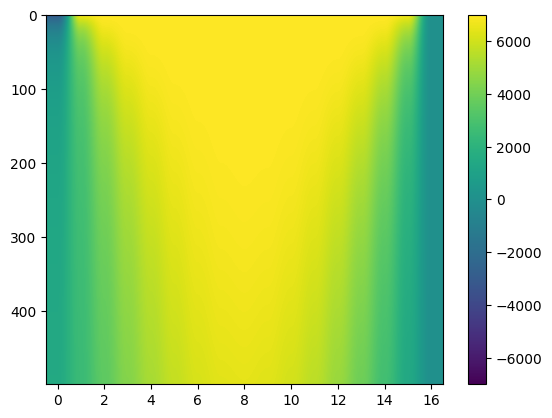

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

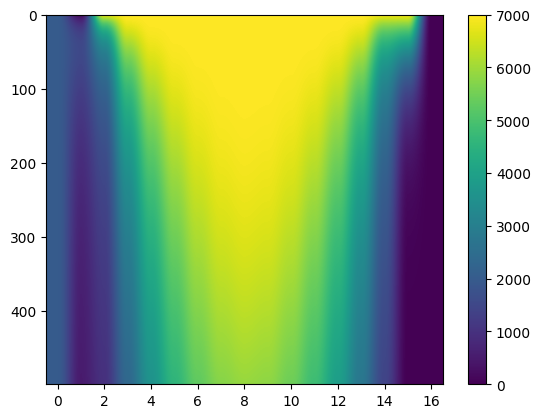

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()